# BME 252 Accelerometer Project

Read in sensor values:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#read in Mikaela data
data = np.loadtxt('mikaela_1.csv', delimiter=',', skiprows = 1)
m_aTime = data[:,0]
m_aX = data[:, 1]
m_aY = data[:, 2]
m_aZ = data[:, 3]
m_gTime = data[:, 4]
m_gX = data[:,5]
m_gY = data[:, 6]
m_gZ = data[:, 7]

#read in Daphne Data
data = np.loadtxt('daphne_1.csv', delimiter=',', skiprows = 1)
d_aTime = data[:,0]
d_aX = data[:, 1]
d_aY = data[:, 2]
d_aZ = data[:, 3]
d_gTime = data[:, 4]
d_gX = data[:,5]
d_gY = data[:, 6]
d_gZ = data[:, 7]

#read in Cassie Data
data = np.loadtxt('cassie_1.csv', delimiter=',', skiprows = 1)
c_aTime = data[:,0]
c_aX = data[:, 1]
c_aY = data[:, 2]
c_aZ = data[:, 3]
c_gTime = data[:, 4]
c_gX = data[:,5]
c_gY = data[:, 6]
c_gZ = data[:, 7]

## Acceleration Signals

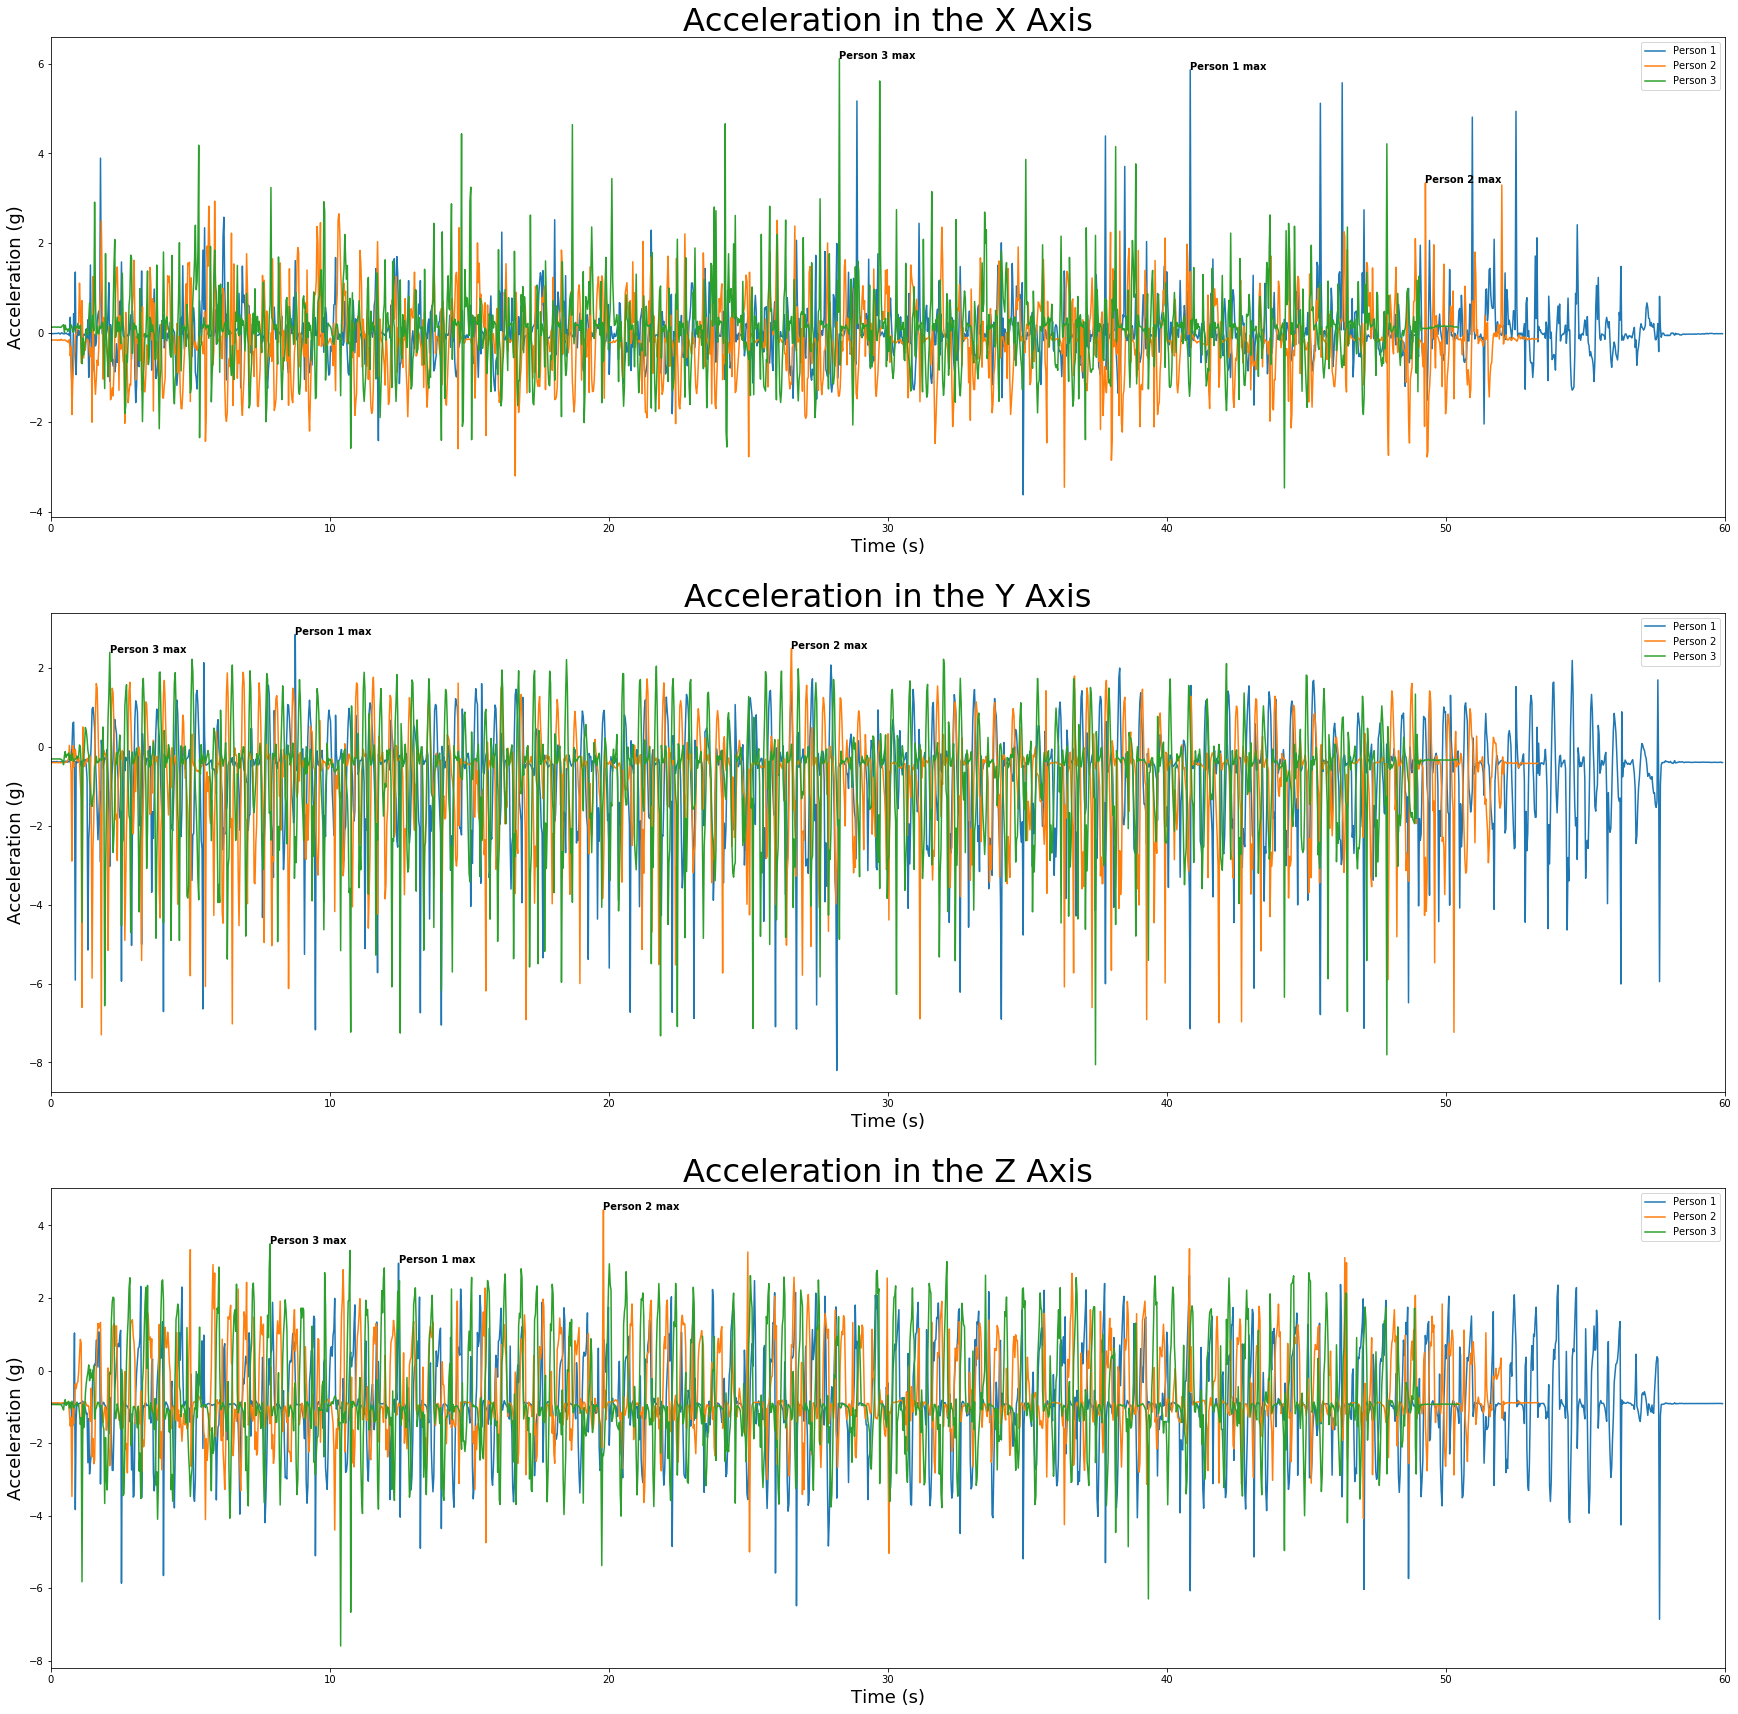

In [17]:
plt.figure(figsize = (30,30))
m_aTime = m_aTime - m_aTime[0]
d_aTime = d_aTime - d_aTime[0]
c_aTime = c_aTime - c_aTime[0]
ylabel = 'Acceleration (g)'
plt.subplot(3,1,1)
plt.title('Acceleration in the X Axis', fontsize=32)
plotVals(m_aTime, m_aX,'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_aTime,m_aX),getMaxArray(m_aX)[0]),weight = 'bold')
plotVals(d_aTime, d_aX,'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_aTime,d_aX),getMaxArray(d_aX)[0]),weight = 'bold')
plotVals(c_aTime, c_aX,'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_aTime,c_aX),getMaxArray(c_aX)[0]),weight = 'bold')

plt.subplot(3,1,2)
plt.title('Acceleration in the Y Axis', fontsize=32)
plotVals(m_aTime, m_aY,'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_aTime,m_aY),getMaxArray(m_aY)[0]),weight = 'bold')
plotVals(d_aTime, d_aY,'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_aTime,d_aY),getMaxArray(d_aY)[0]),weight = 'bold')
plotVals(c_aTime, c_aY,'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_aTime,c_aY),getMaxArray(c_aY)[0]),weight = 'bold')

plt.subplot(3,1,3)
plt.title('Acceleration in the Z Axis', fontsize=32)
plotVals(m_aTime, m_aZ,'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_aTime,m_aZ),getMaxArray(m_aZ)[0]),weight = 'bold')
plotVals(d_aTime, d_aZ,'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_aTime,d_aZ),getMaxArray(d_aZ)[0]),weight = 'bold')
plotVals(c_aTime, c_aZ,'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_aTime,c_aZ),getMaxArray(c_aZ)[0]),weight = 'bold')

plt.show()

Plot max acceleration values for each axis, and absolute acceleration:

In [18]:
def plotVals(x,y,identifier):
    plt.xlim(0,60)
    plt.plot(x,y, label = identifier)
    plt.ylabel(ylabel, fontsize = 18)
    plt.xlabel('Time (s)', fontsize = 18)
    plt.legend()


In [19]:
def getAbsVals(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

In [20]:
def getMeanArray(array):
    return np.full((np.size(array)), np.mean(array))

In [21]:
def getMaxArray(array):
    return np.full((np.size(array)), np.max(array))

In [22]:
def getMaxIndex(xArray,yArray):
    return xArray[np.argmax(yArray)]

In [23]:
def getIntegral(x1, x2, start):
    return integrate.cumtrapz(x1,x2, initial = start)

In [24]:
def getPosition(x1, x2, start):
    v = integrate.cumtrapz(x1, x2, initial = start)
    return integrate.cumtrapz(v, x2, initial = start)

Plot average acceleration for each axis and absolute acceleration:

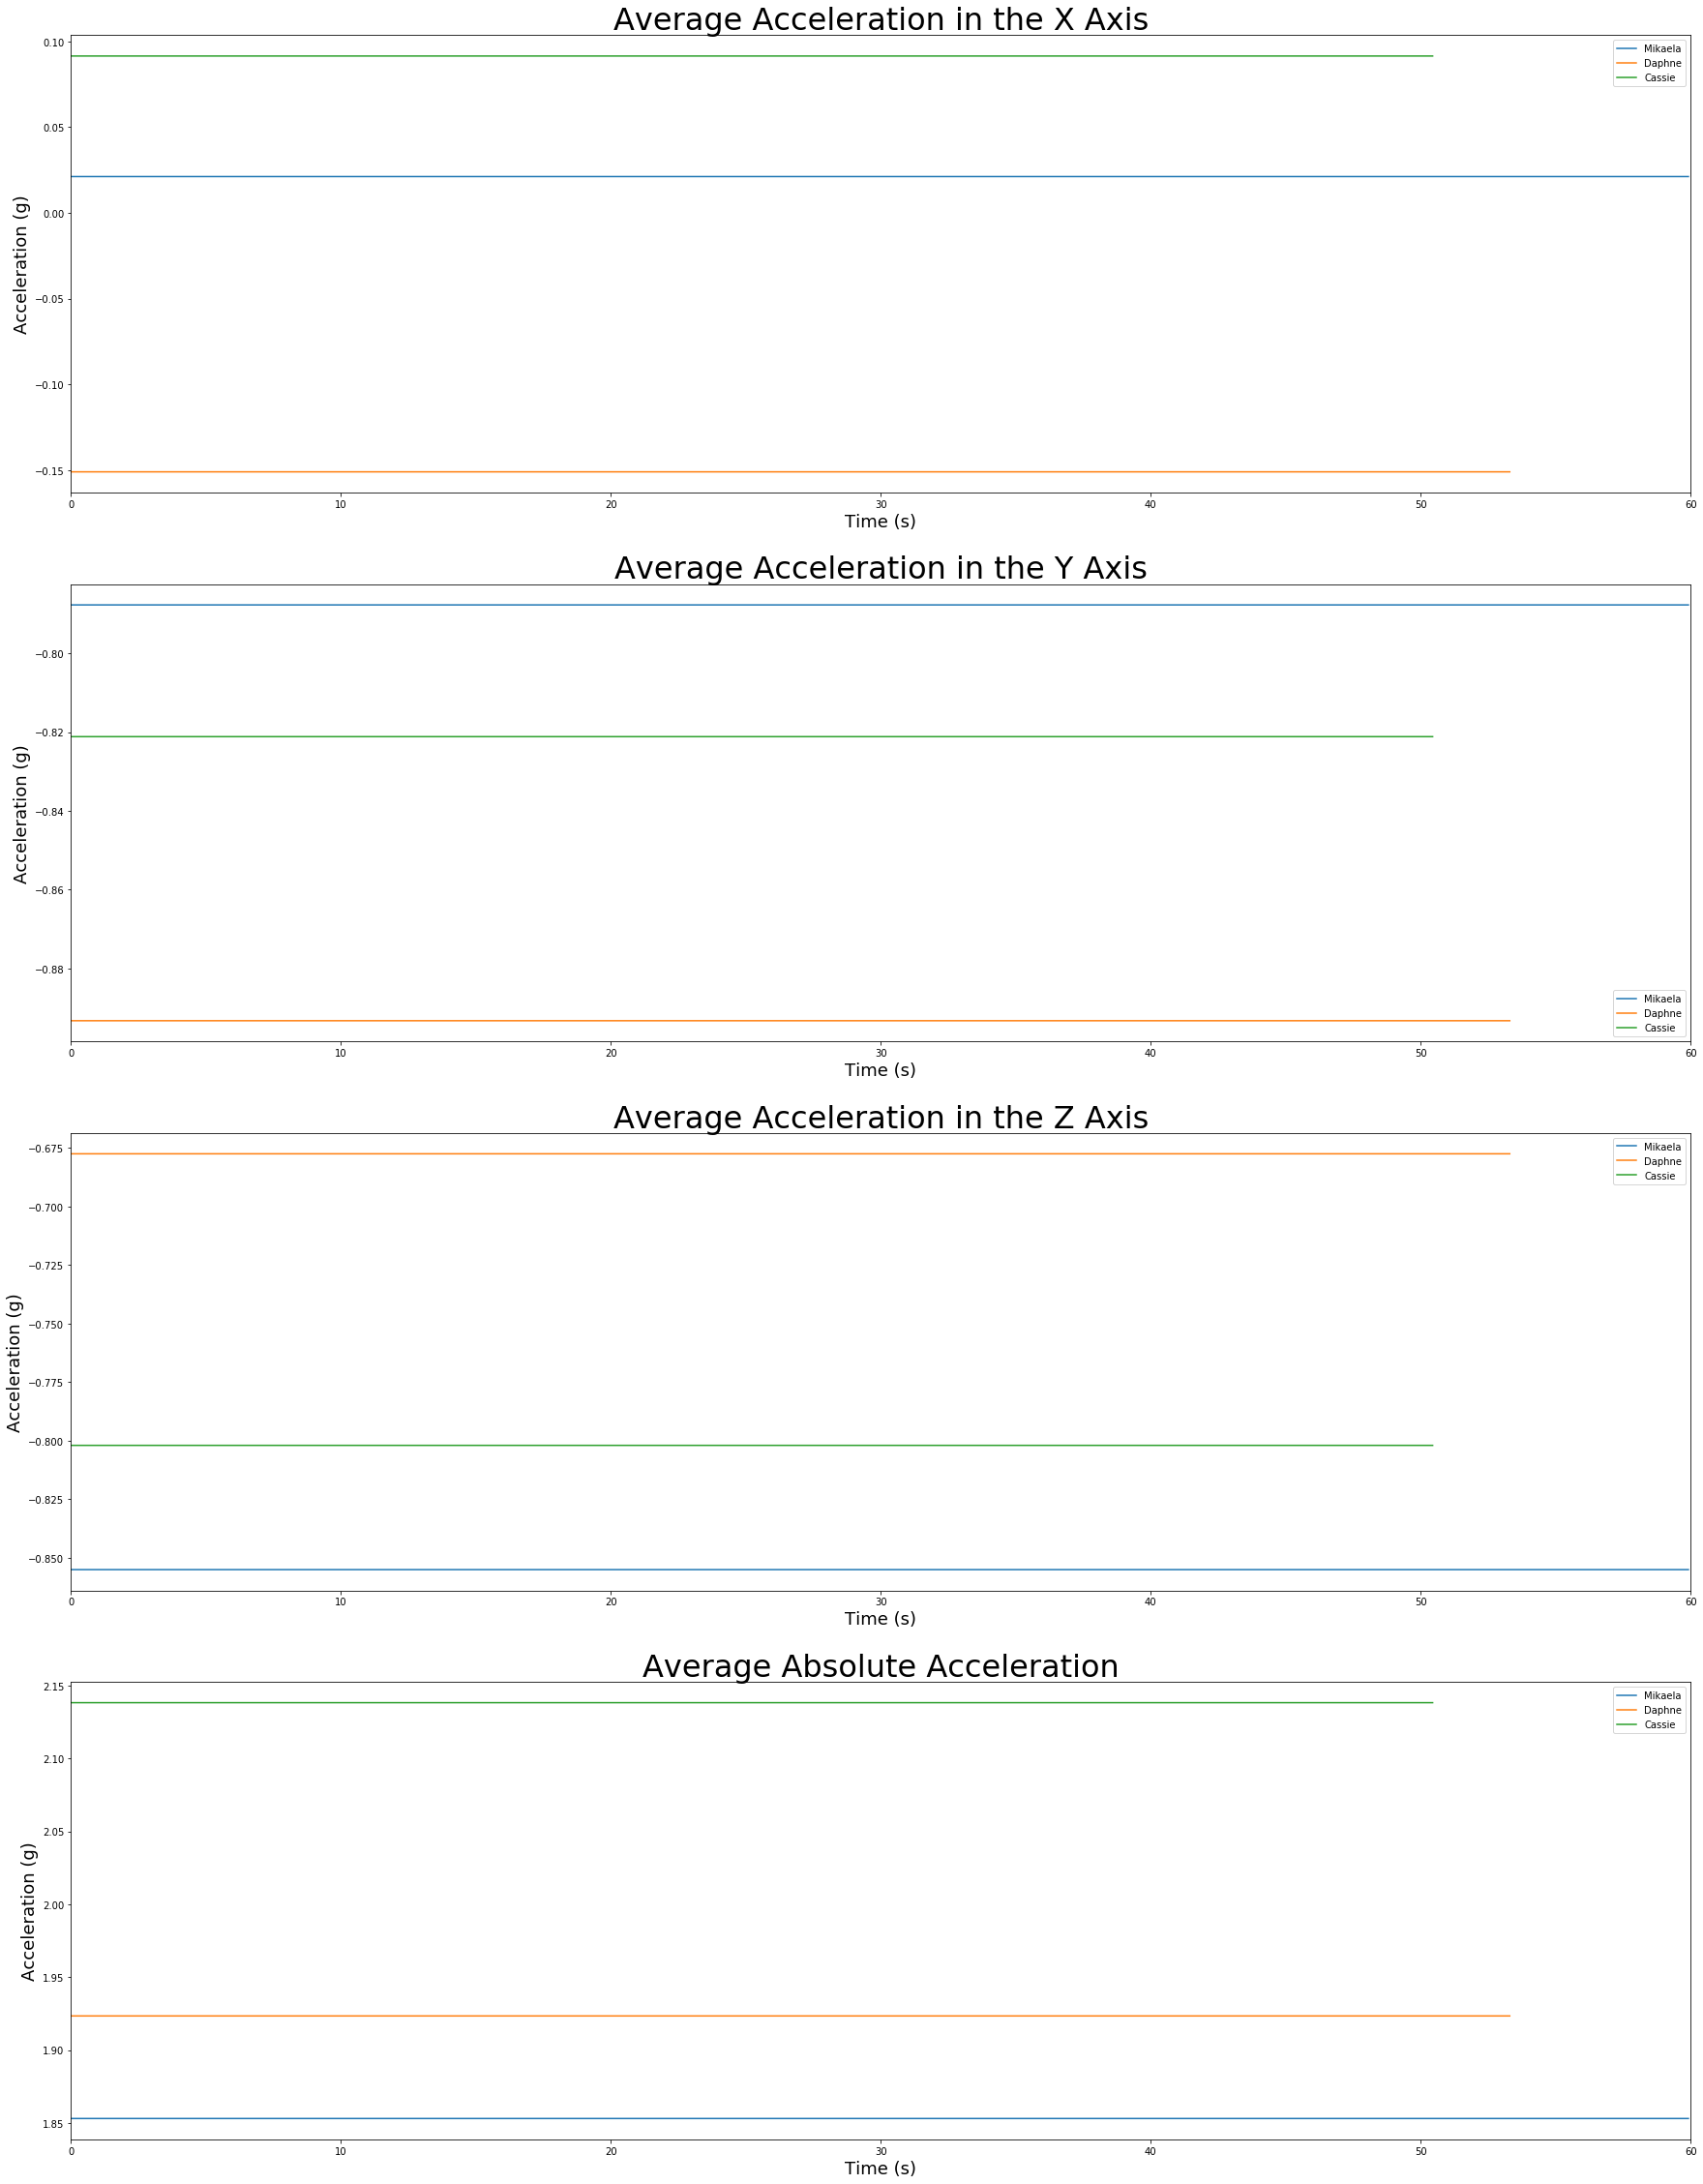

In [25]:
#Calculate mean accelerations
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)

plt.title('Average Acceleration in the X Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aX), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aX), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aX), 'Cassie')

plt.subplot(4,1,2)
plt.title('Average Acceleration in the Y Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aY), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aY), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aY), 'Cassie')

plt.subplot(4,1,3)
plt.title('Average Acceleration in the Z Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aZ), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aZ), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aZ), 'Cassie')

plt.subplot(4,1,4)
plt.title('Average Absolute Acceleration', fontsize=32)
plotVals(m_aTime, getMeanArray(m_absVals), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_absVals), 'Daphne')
plotVals(c_aTime, getMeanArray(c_absVals), 'Cassie')


plt.show()

## Rotational Velocity

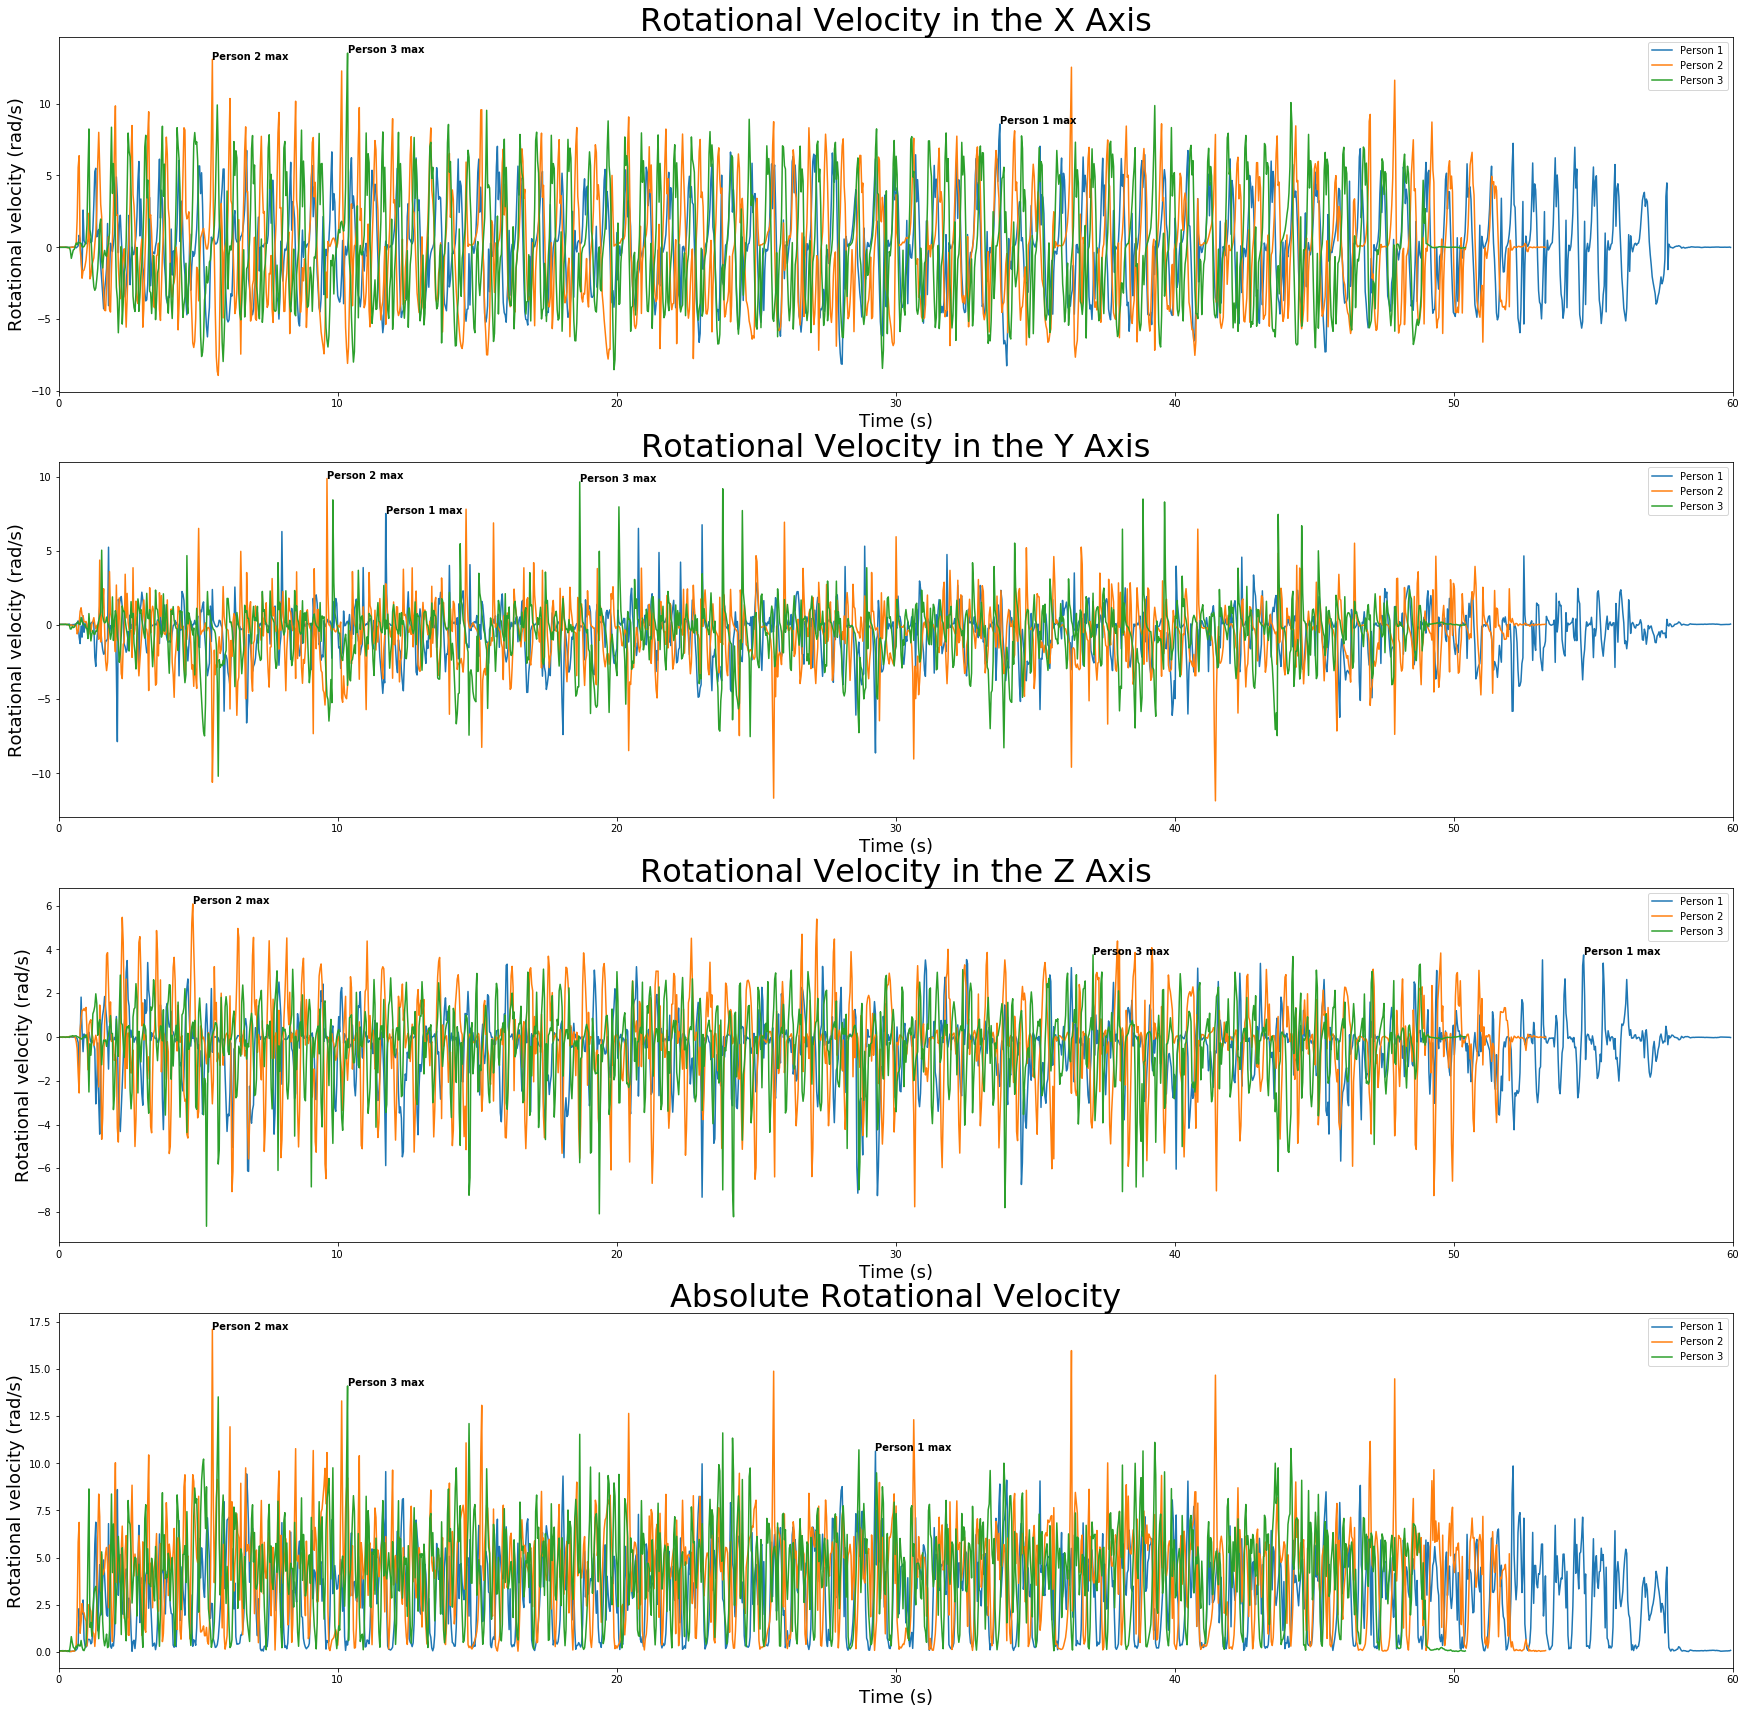

In [26]:
#plot rotational velocities
m_absGVals = getAbsVals(m_gX, m_gY, m_gZ)
d_absGVals = getAbsVals(d_gX, d_gY, d_gZ)
c_absGVals = getAbsVals(c_gX, c_gY, c_gZ)

plt.figure(figsize = (30,30))
m_gTime = m_gTime - m_gTime[0]
d_gTime = d_gTime - d_gTime[0]
c_gTime = c_gTime - c_gTime[0]
ylabel = 'Rotational velocity (rad/s)'
plt.subplot(4,1,1)
plt.title('Rotational Velocity in the X Axis', fontsize = 32)
plotVals(m_gTime, m_gX, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gX),getMaxArray(m_gX)[0]),weight = 'bold')
plotVals(d_gTime, d_gX, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gX),getMaxArray(d_gX)[0]),weight = 'bold')
plotVals(c_gTime, c_gX, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gX),getMaxArray(c_gX)[0]),weight = 'bold')

plt.subplot(4,1,2)
plt.title('Rotational Velocity in the Y Axis', fontsize = 32)
plotVals(m_gTime, m_gY, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gY),getMaxArray(m_gY)[0]),weight = 'bold')
plotVals(d_gTime, d_gY, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gY),getMaxArray(d_gY)[0]),weight = 'bold')
plotVals(c_gTime, c_gY, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gY),getMaxArray(c_gY)[0]),weight = 'bold')

plt.subplot(4,1,3)
plt.title('Rotational Velocity in the Z Axis', fontsize = 32)
plotVals(m_gTime, m_gZ, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gZ),getMaxArray(m_gZ)[0]),weight = 'bold')
plotVals(d_gTime, d_gZ, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gZ),getMaxArray(d_gZ)[0]),weight = 'bold')
plotVals(c_gTime, c_gZ, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gZ),getMaxArray(c_gZ)[0]),weight = 'bold')

plt.subplot(4,1,4)
plt.title('Absolute Rotational Velocity', fontsize = 32)
plotVals(m_gTime, m_absGVals, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_absGVals),getMaxArray(m_absGVals)[0]),weight = 'bold')
plotVals(d_gTime, d_absGVals, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_absGVals),getMaxArray(d_absGVals)[0]),weight = 'bold')
plotVals(c_gTime, c_absGVals, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_absGVals),getMaxArray(c_absGVals)[0]),weight = 'bold')

plt.show()

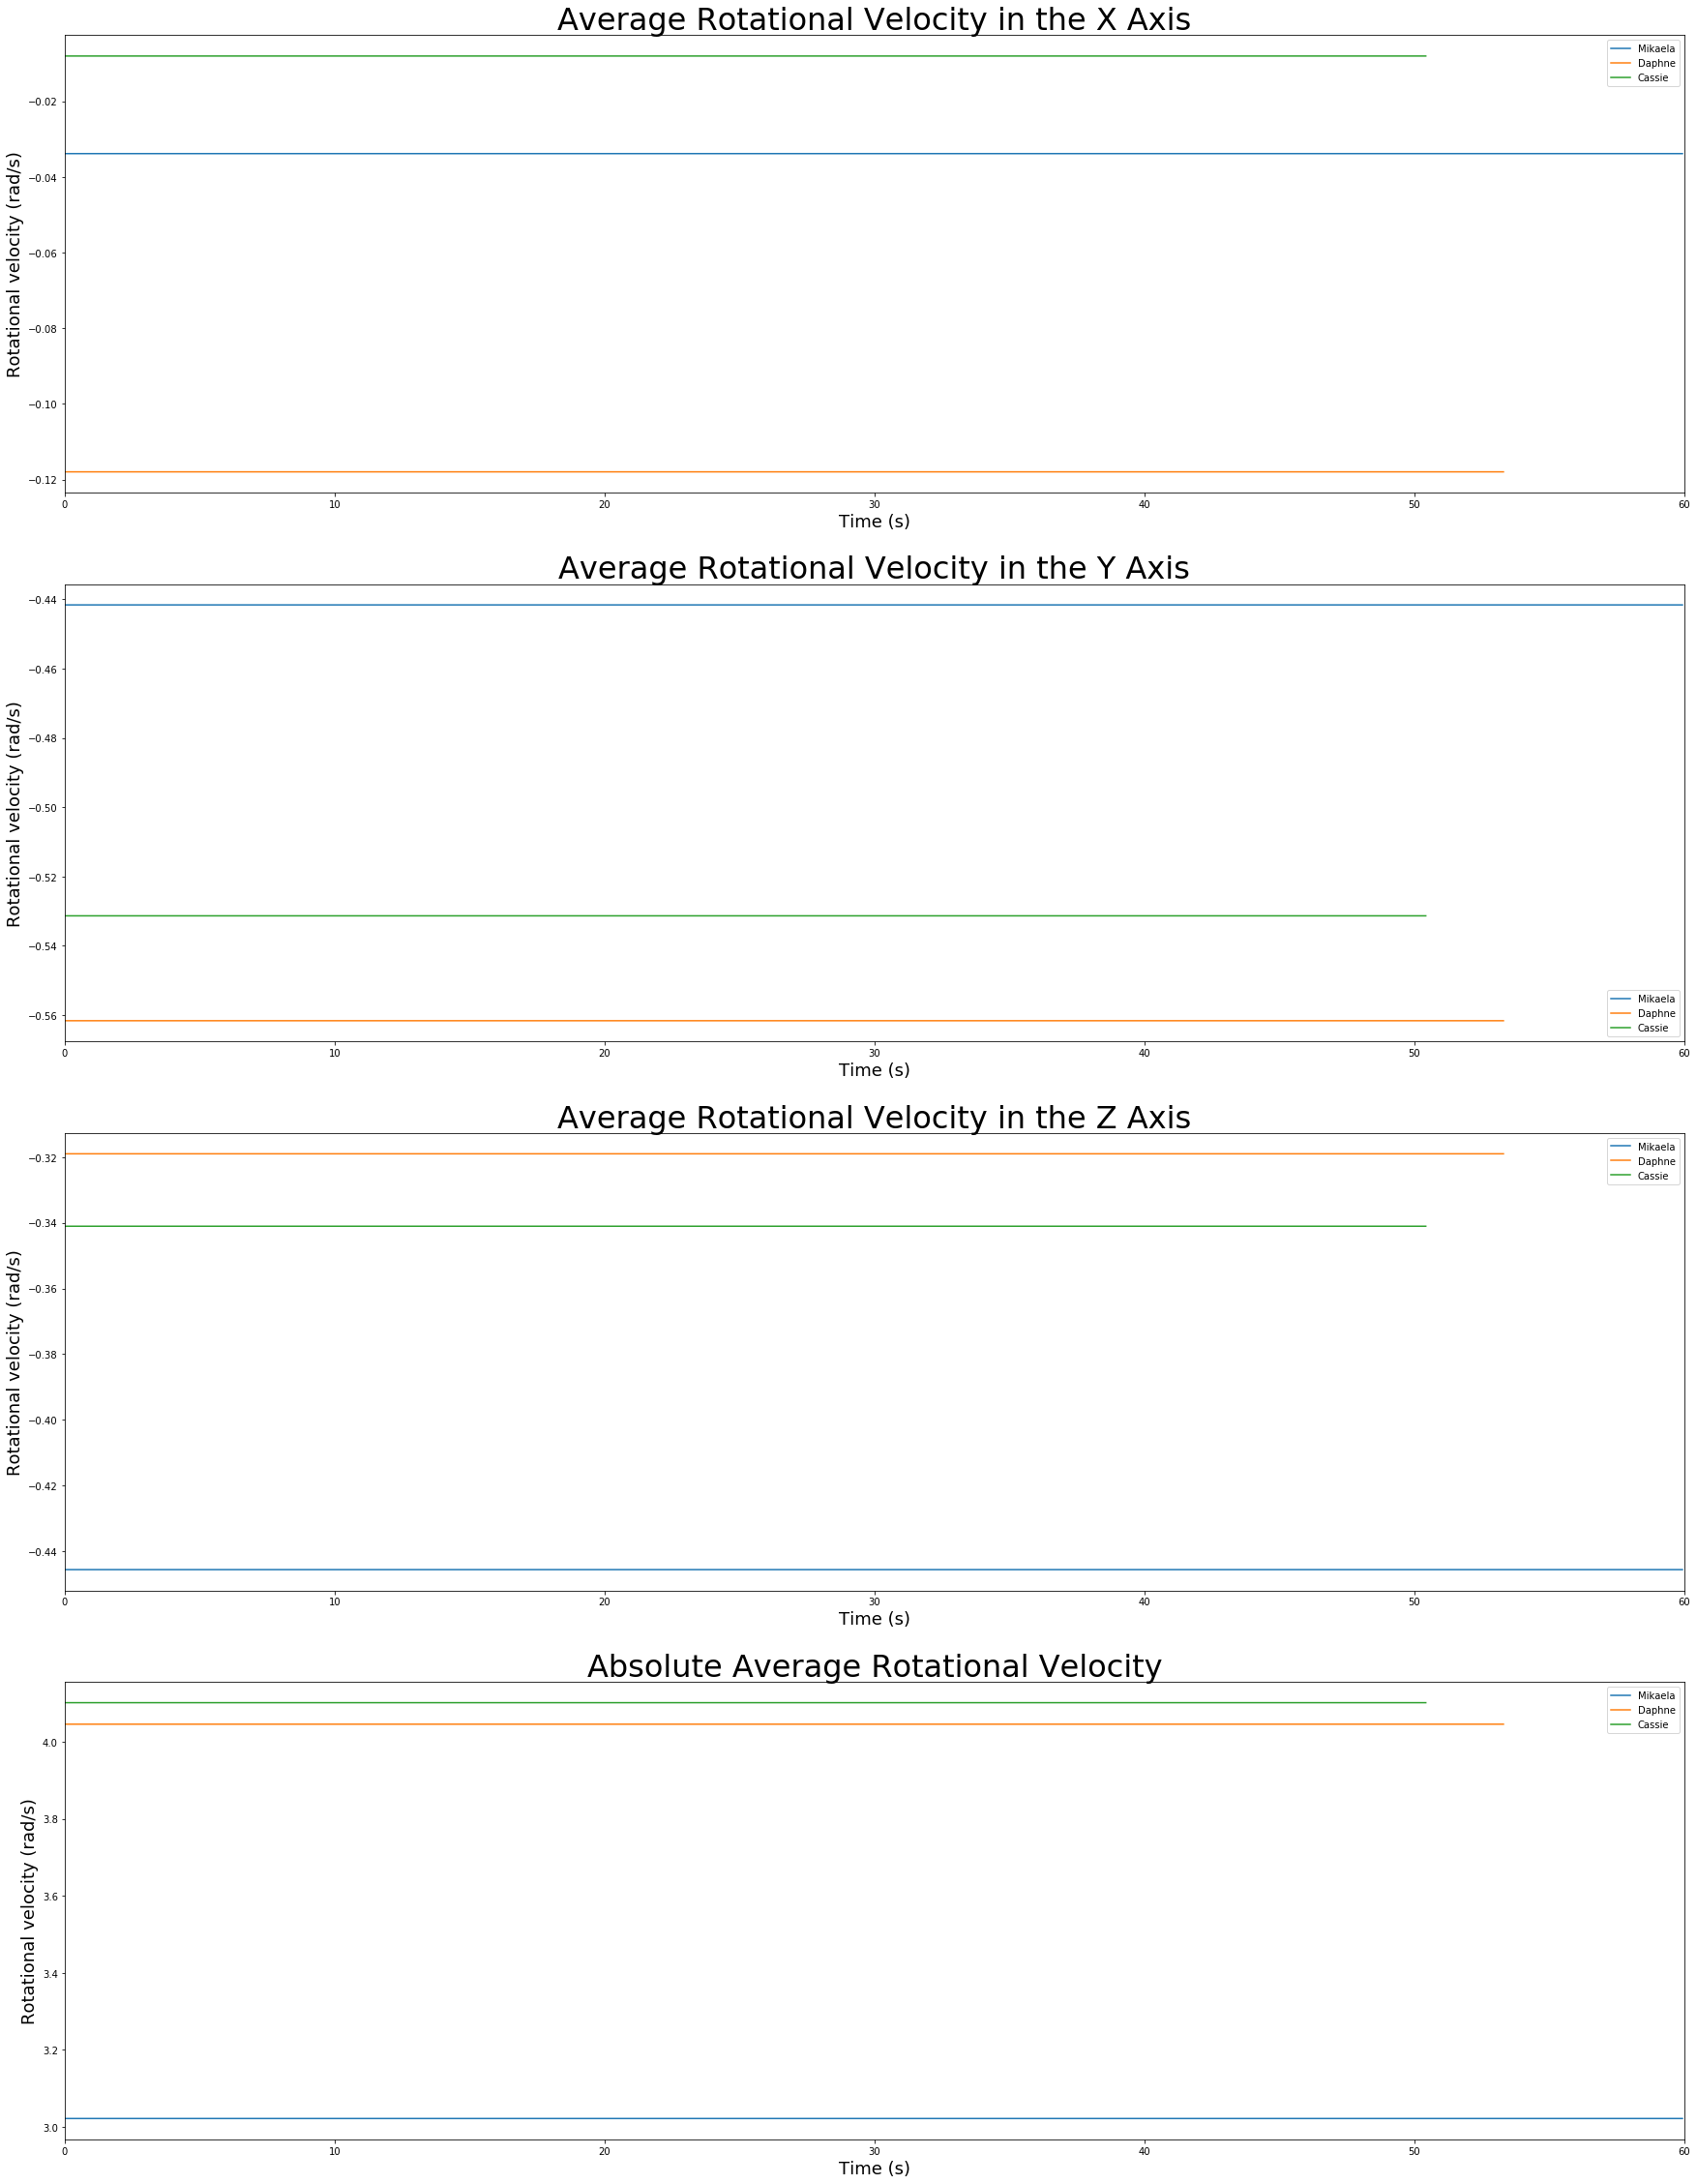

In [27]:
#plot average rotational velocity
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Rotational velocity (rad/s)'
plt.title('Average Rotational Velocity in the X Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(m_gX), 'Mikaela')
plotVals(d_gTime, getMeanArray(d_gX), 'Daphne')
plotVals(c_gTime, getMeanArray(c_gX), 'Cassie')

plt.subplot(4,1,2)
plt.title('Average Rotational Velocity in the Y Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(m_gY), 'Mikaela')
plotVals(d_gTime, getMeanArray(d_gY), 'Daphne')
plotVals(c_gTime, getMeanArray(c_gY), 'Cassie')

plt.subplot(4,1,3)
plt.title('Average Rotational Velocity in the Z Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(m_gZ), 'Mikaela')
plotVals(d_gTime, getMeanArray(d_gZ), 'Daphne')
plotVals(c_gTime, getMeanArray(c_gZ), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Average Rotational Velocity', fontsize=32)
plotVals(m_gTime, getMeanArray(m_absGVals), 'Mikaela')
plotVals(d_gTime, getMeanArray(d_absGVals), 'Daphne')
plotVals(c_gTime, getMeanArray(c_absGVals), 'Cassie')

plt.show()

## Angular Distance

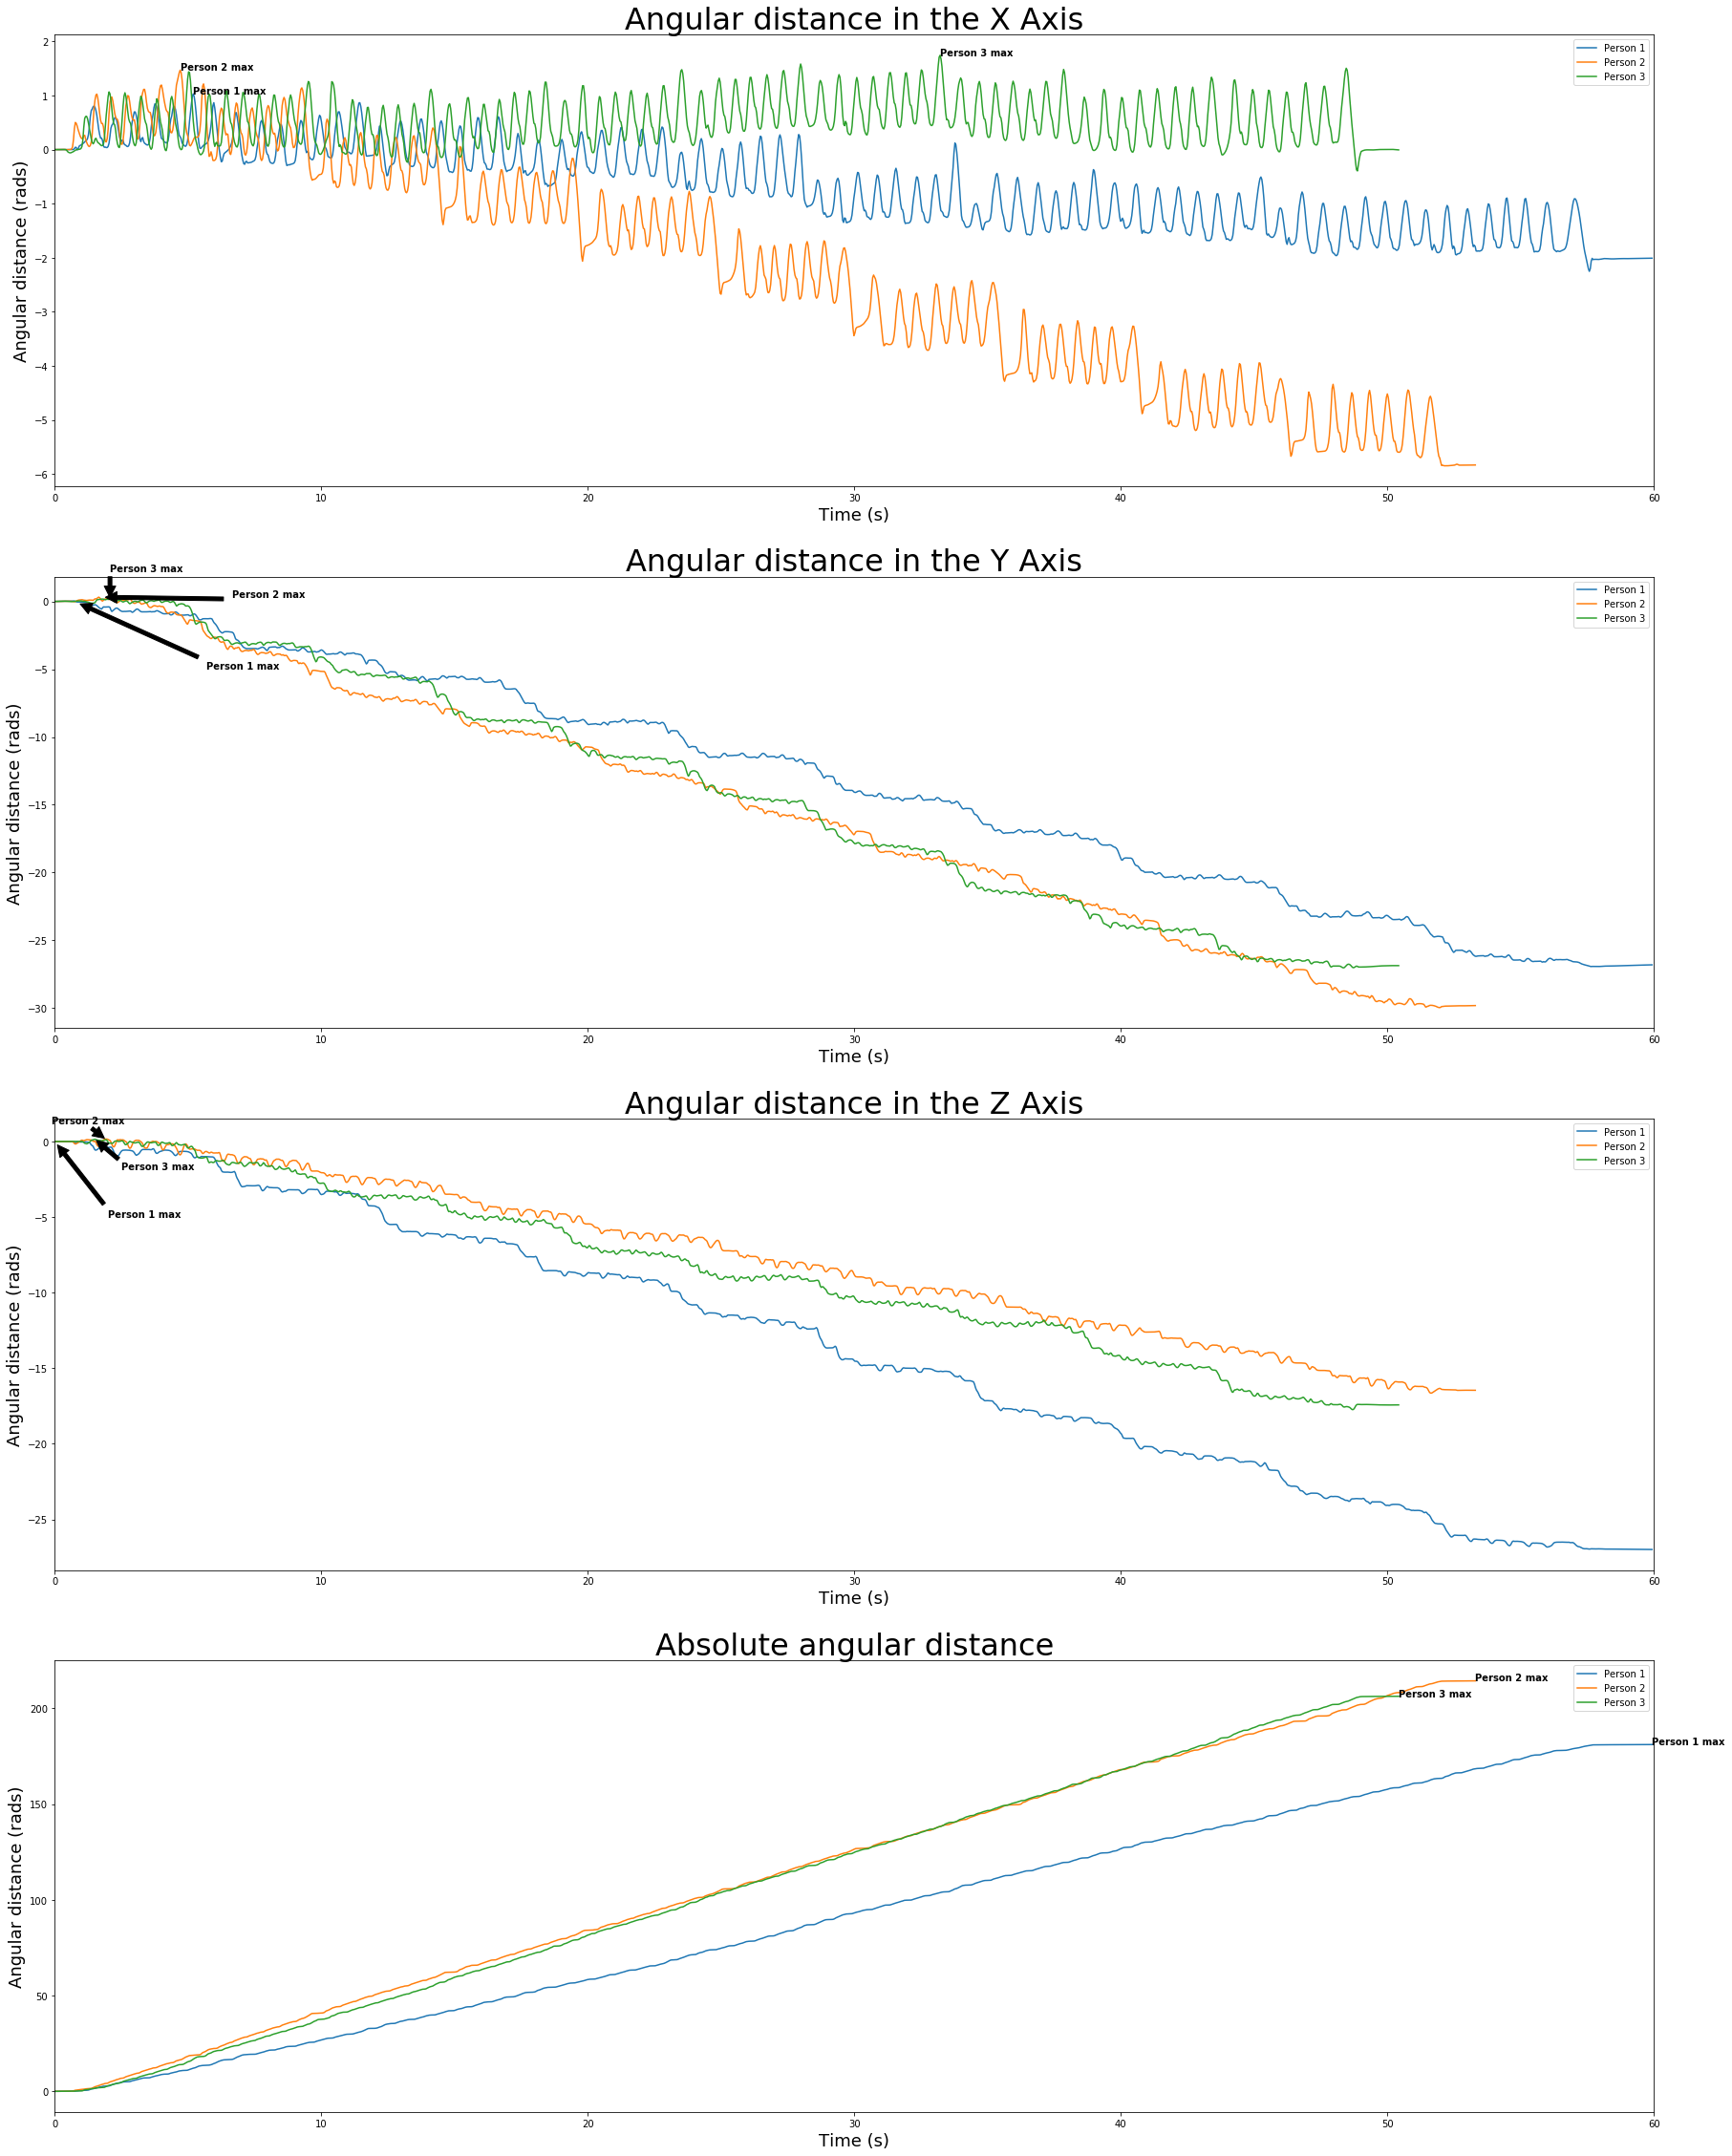

In [29]:
#Calculate angular distance

plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Angular distance (rads)'
plt.title('Angular distance in the X Axis', fontsize = 32)
m_gXd = getIntegral(m_gX, m_gTime, 0)
plotVals(m_gTime, m_gXd, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gXd),getMaxArray(m_gXd)[0]),weight = 'bold')
d_gXd = getIntegral(d_gX, d_gTime, 0)
plotVals(d_gTime, d_gXd, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gXd),getMaxArray(d_gXd)[0]),weight = 'bold')
c_gXd = getIntegral(c_gX, c_gTime, 0)
plotVals(c_gTime, c_gXd, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gXd),getMaxArray(c_gXd)[0]),weight = 'bold')

plt.subplot(4,1,2)
plt.title('Angular distance in the Y Axis', fontsize = 32)
m_gYd = getIntegral(m_gY, m_gTime, 0)
plotVals(m_gTime, m_gYd, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gYd),getMaxArray(m_gYd)[0]), 
            xytext=(getMaxIndex(m_gTime,m_gYd)+5,getMaxArray(m_gYd)[0]-5),
            arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')
d_gYd = getIntegral(d_gY, d_gTime, 0)
plotVals(d_gTime, d_gYd, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gYd),getMaxArray(d_gYd)[0]), 
             xytext=(getMaxIndex(d_gTime,d_gYd)+5,getMaxArray(d_gYd)[0]),
             arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')
c_gYd = getIntegral(c_gY, c_gTime, 0)
plotVals(c_gTime, c_gYd, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gYd),getMaxArray(c_gYd)[0]), 
             xytext=(getMaxIndex(c_gTime,c_gYd),getMaxArray(c_gYd)[0]+2),
             arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')

plt.subplot(4,1,3)
plt.title('Angular distance in the Z Axis', fontsize = 32)
m_gZd = getIntegral(m_gZ, m_gTime, 0)
plotVals(m_gTime, m_gZd, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_gZd),getMaxArray(m_gZd)[0]), 
             xytext=(getMaxIndex(m_gTime,m_gZd)+2,getMaxArray(m_gZd)[0]-5),
             arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')
d_gZd = getIntegral(d_gZ, d_gTime, 0)
plotVals(d_gTime, d_gZd, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_gZd),getMaxArray(d_gZd)[0]), 
             xytext=(getMaxIndex(d_gTime,d_gZd)-2,getMaxArray(d_gZd)[0]+1),
             arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')
c_gZd = getIntegral(c_gZ, c_gTime, 0)
plotVals(c_gTime, c_gZd, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_gZd),getMaxArray(c_gZd)[0]), 
             xytext=(getMaxIndex(c_gTime,c_gZd)+1,getMaxArray(c_gZd)[0]-2),
             arrowprops=dict(facecolor='black', shrink=0.05), weight = 'bold')

plt.subplot(4,1,4)
plt.title('Absolute angular distance', fontsize = 32)
m_Absd = getIntegral(m_absGVals, m_gTime, 0)
plotVals(m_gTime, m_Absd, 'Person 1')
plt.annotate('Person 1 max',xy=(getMaxIndex(m_gTime,m_Absd),getMaxArray(m_Absd)[0]),weight = 'bold')
d_Absd = getIntegral(d_absGVals, d_gTime, 0)
plotVals(d_gTime, d_Absd, 'Person 2')
plt.annotate('Person 2 max',xy=(getMaxIndex(d_gTime,d_Absd),getMaxArray(d_Absd)[0]),weight = 'bold')
c_Absd = getIntegral(c_absGVals, c_gTime, 0)
plotVals(c_gTime, c_Absd, 'Person 3')
plt.annotate('Person 3 max',xy=(getMaxIndex(c_gTime,c_Absd),getMaxArray(c_Absd)[0]),weight = 'bold')

plt.show()

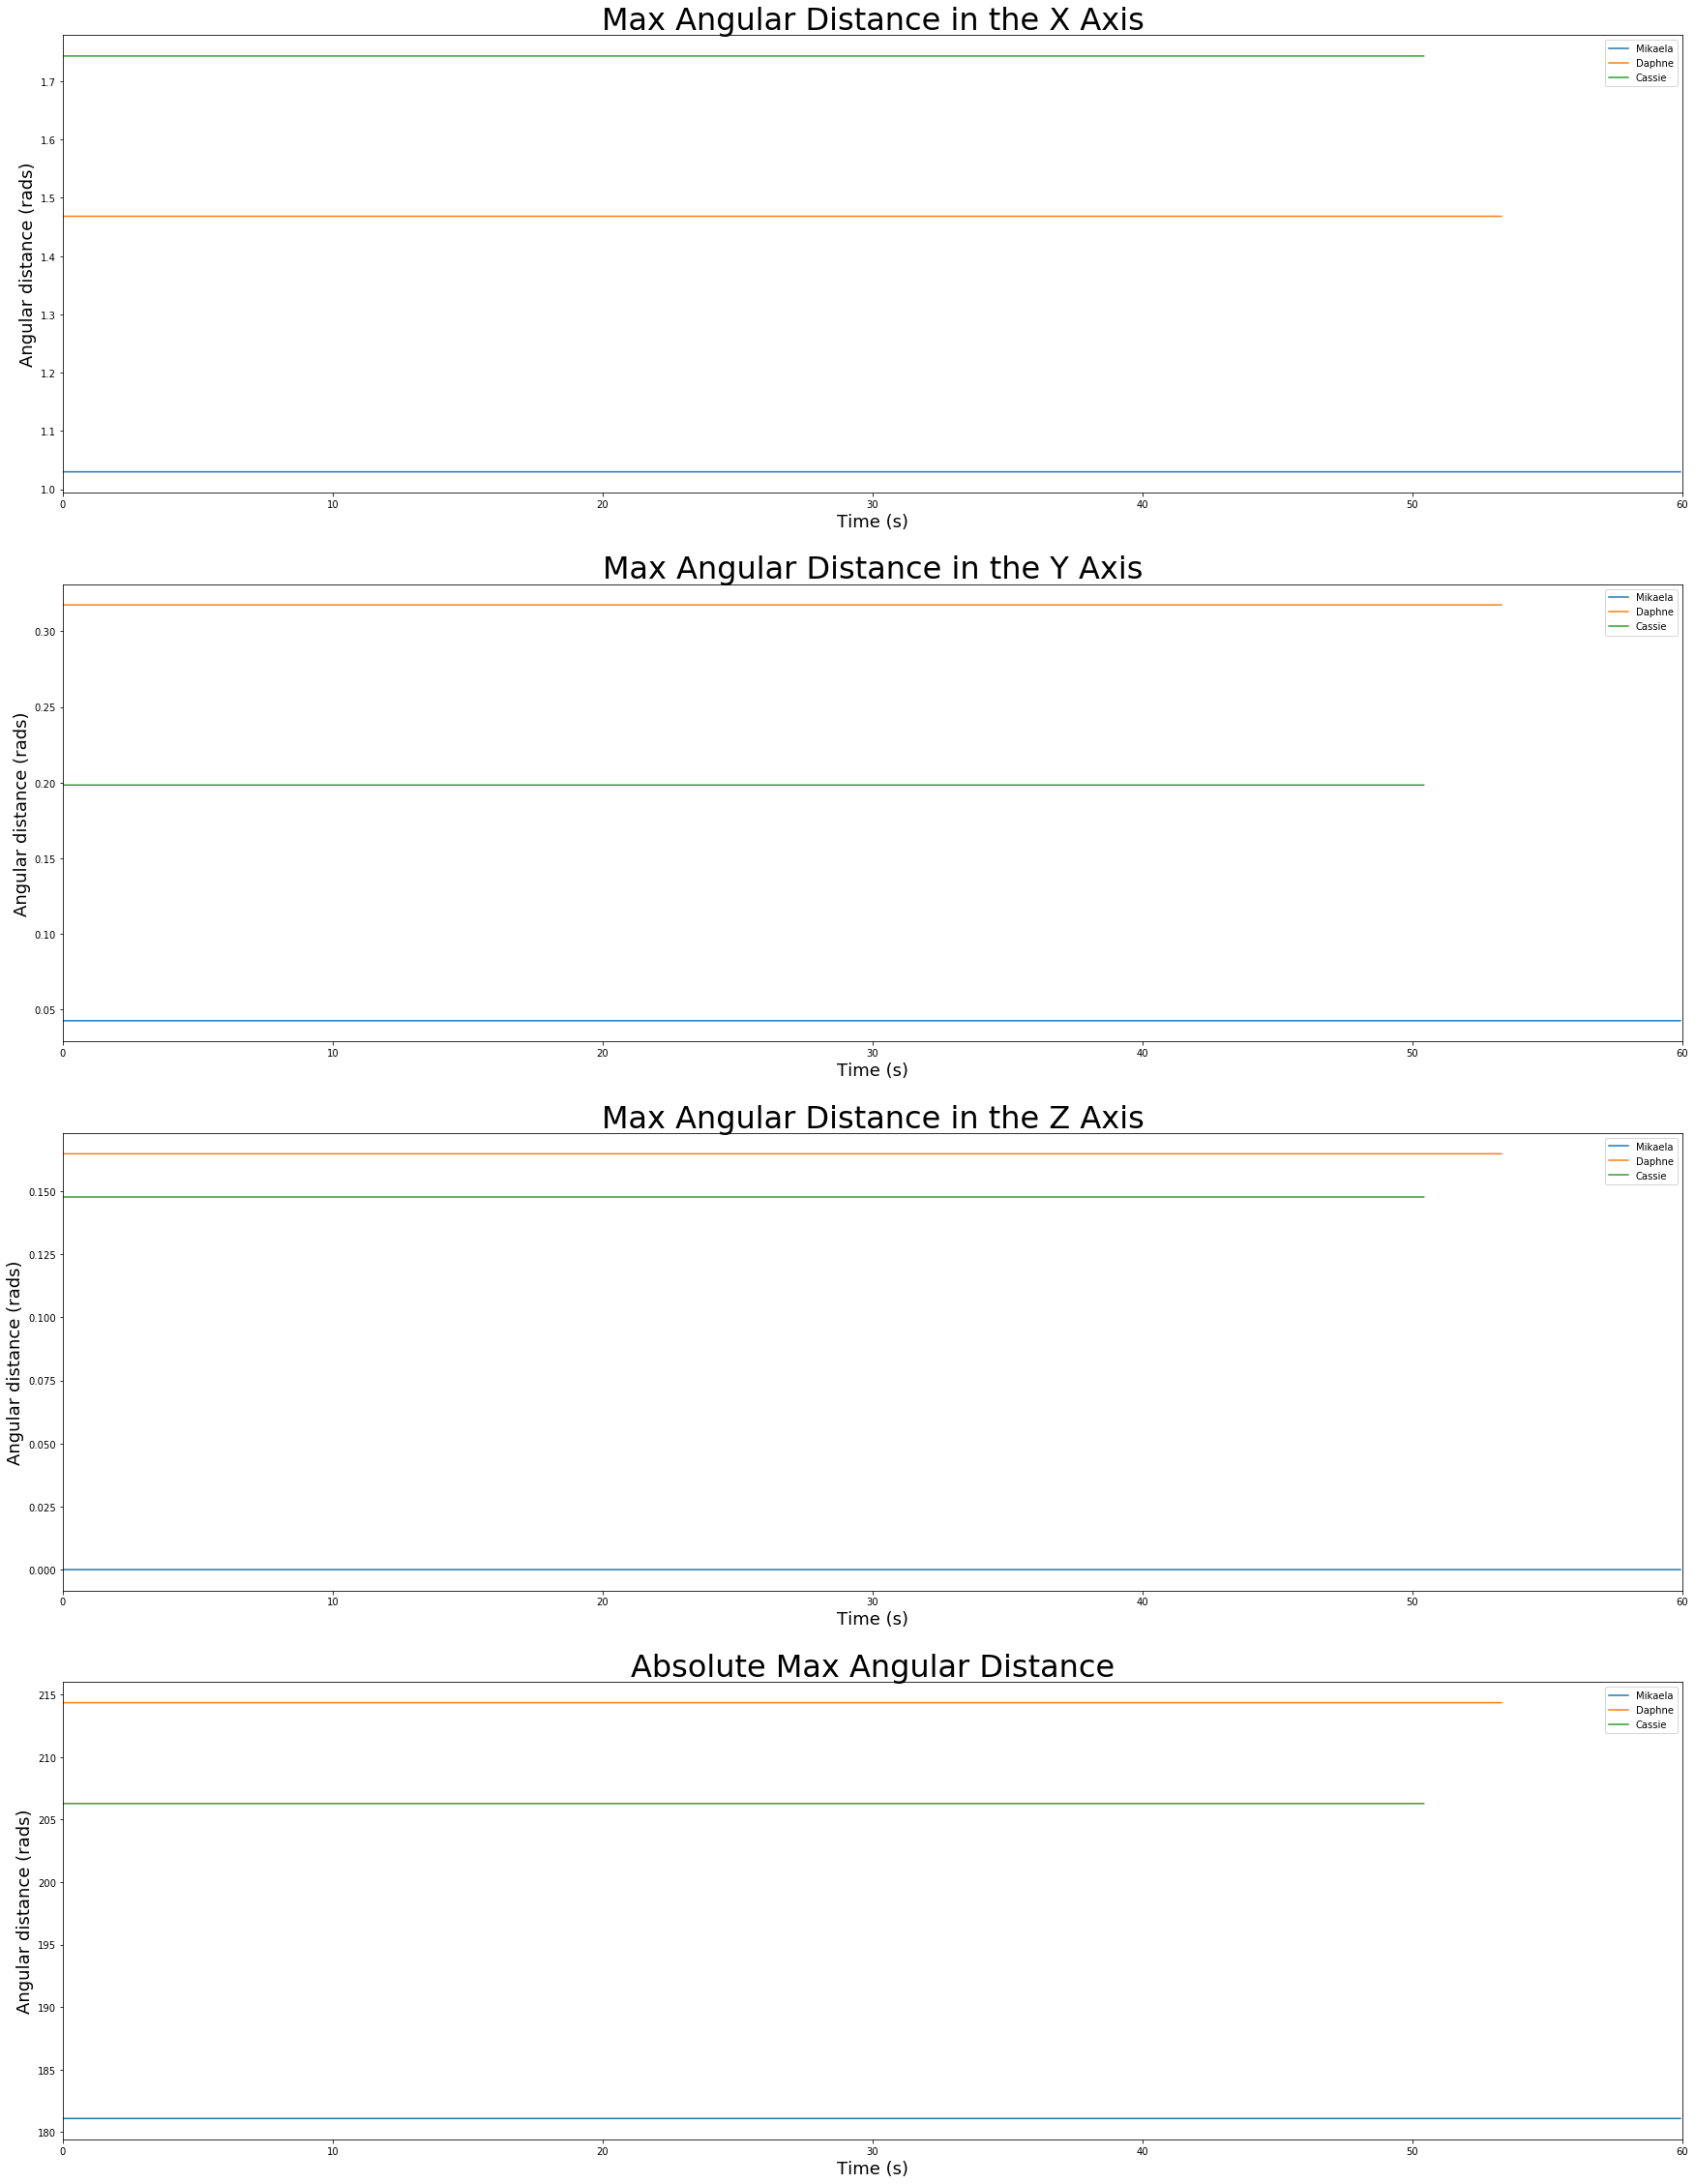

In [73]:
#plot max angular distance
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Angular distance (rads)'
plt.title('Max Angular Distance in the X Axis', fontsize=32)
plotVals(m_gTime, getMaxArray(getIntegral(m_gX, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMaxArray(getIntegral(d_gX, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMaxArray(getIntegral(c_gX, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,2)
plt.title('Max Angular Distance in the Y Axis', fontsize=32)
plotVals(m_gTime, getMaxArray(getIntegral(m_gY, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMaxArray(getIntegral(d_gY, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMaxArray(getIntegral(c_gY, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,3)
plt.title('Max Angular Distance in the Z Axis', fontsize=32)
plotVals(m_gTime, getMaxArray(getIntegral(m_gZ, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMaxArray(getIntegral(d_gZ, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMaxArray(getIntegral(c_gZ, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Max Angular Distance', fontsize=32)
plotVals(m_gTime, getMaxArray(getIntegral(m_absGVals, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMaxArray(getIntegral(d_absGVals, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMaxArray(getIntegral(c_absGVals, c_gTime, 0)), 'Cassie')

plt.show()

In [ ]:
#plot average angular distance
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Angular distance (rads)'
plt.title('Average Angular Distance in the X Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(getIntegral(m_gX, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMeanArray(getIntegral(d_gX, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMeanArray(getIntegral(c_gX, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,2)
plt.title('Average Angular Distance in the Y Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(getIntegral(m_gY, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMeanArray(getIntegral(d_gY, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMeanArray(getIntegral(c_gY, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,3)
plt.title('Average Angular Distance in the Z Axis', fontsize=32)
plotVals(m_gTime, getMeanArray(getIntegral(m_gZ, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMeanArray(getIntegral(d_gZ, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMeanArray(getIntegral(c_gZ, c_gTime, 0)), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Average Angular Distance', fontsize=32)
plotVals(m_gTime, getMeanArray(getIntegral(m_absGVals, m_gTime, 0)), 'Mikaela')
plotVals(d_gTime, getMeanArray(getIntegral(d_absGVals, d_gTime, 0)), 'Daphne')
plotVals(c_gTime, getMeanArray(getIntegral(c_absGVals, c_gTime, 0)), 'Cassie')

plt.show()

## Velocity Signals

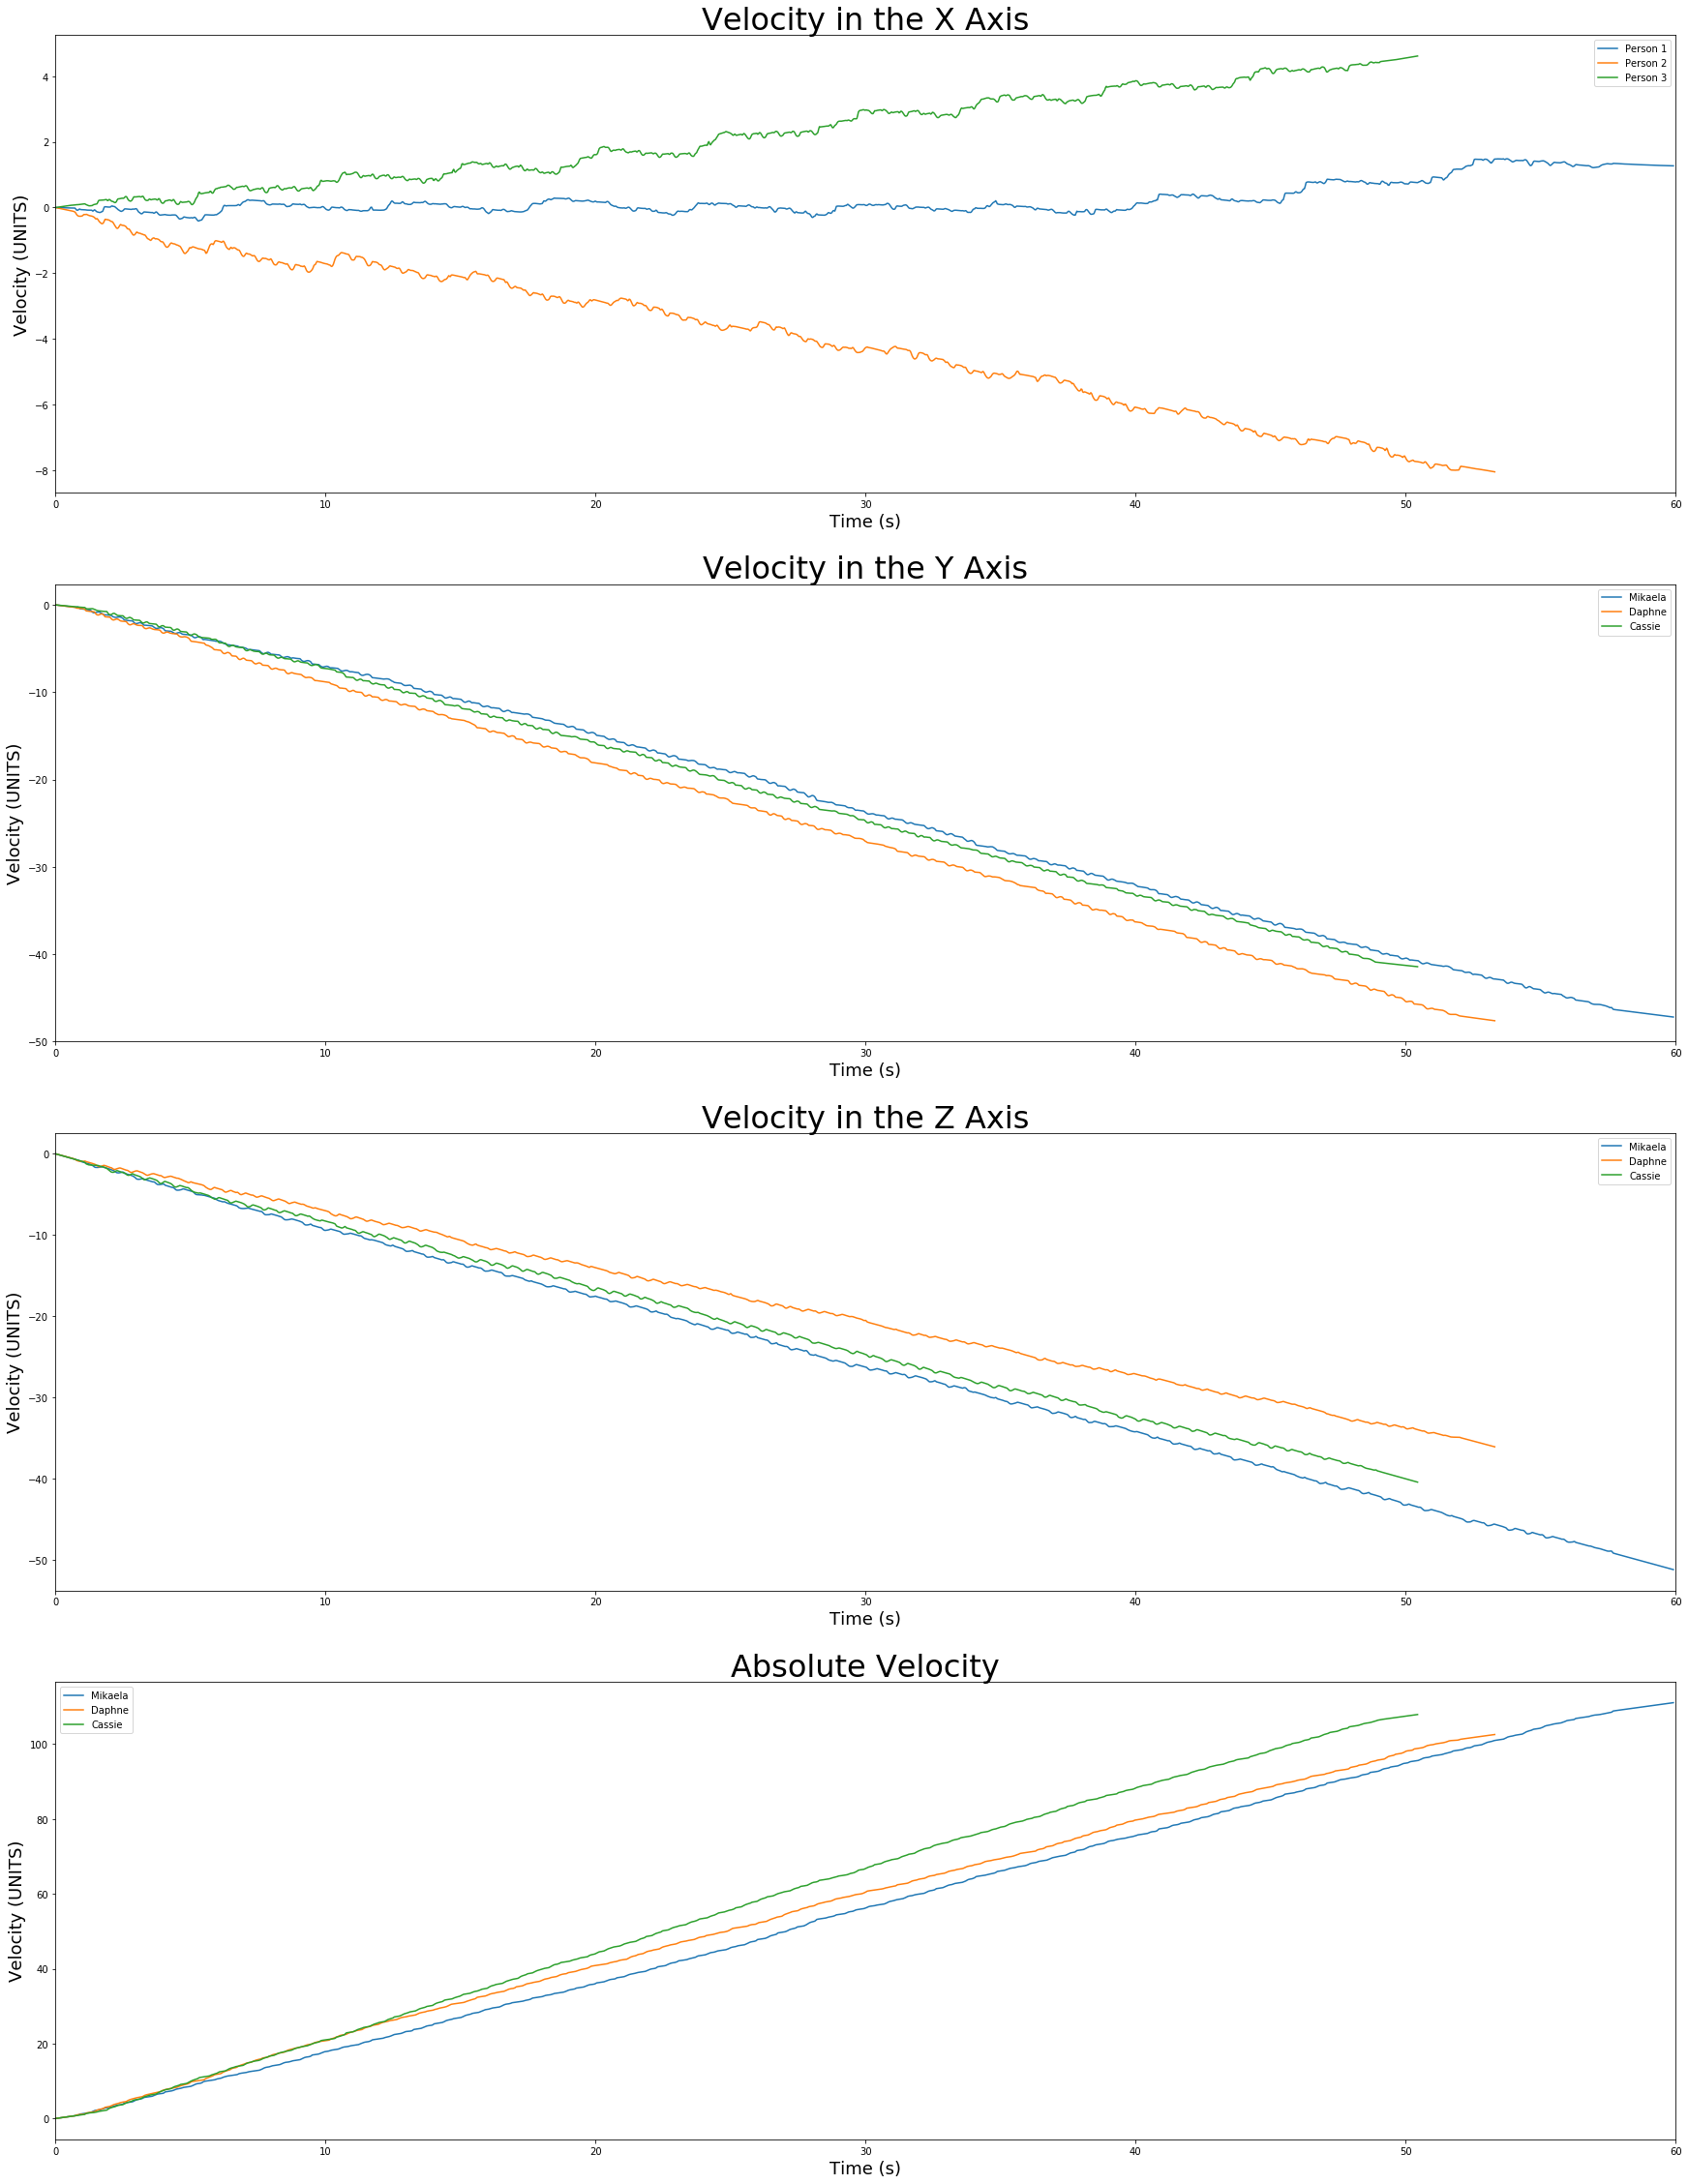

In [31]:
#Calculate velocity
#plot max  X acceleration
m_absVals = getAbsVals(m_aX, m_aY, m_aZ)
d_absVals = getAbsVals(d_aX, d_aY, d_aZ)
c_absVals = getAbsVals(c_aX, c_aY, c_aZ)

plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Velocity (UNITS)'
plt.title('Velocity in the X Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aX, m_aTime, 0), 'Person 1')
plt.annotate('Person 1 max',xy=(m_aTime, m_aX),weight = 'bold')
plotVals(d_aTime, getIntegral(d_aX, d_aTime, 0), 'Person 2')
plotVals(c_aTime, getIntegral(c_aX, c_aTime, 0), 'Person 3')

plt.subplot(4,1,2)
plt.title('Velocity in the Y Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aY, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_aY, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_aY, c_aTime, 0), 'Cassie')

plt.subplot(4,1,3)
plt.title('Velocity in the Z Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aZ, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_aZ, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_aZ, c_aTime, 0), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Velocity', fontsize=32)
plotVals(m_aTime, getIntegral(m_absVals, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_absVals, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_absVals, c_aTime, 0), 'Cassie')
plt.show()

## Displacement Signals

In [ ]:
#Calculate distance

#Distance X
m_dX = getPosition(m_aX, m_aTime, 0)
d_dX = getPosition(d_aX, d_aTime, 0)
c_dX = getPosition(c_aX, c_aTime, 0)

#Distance Y
m_dY = getPosition(m_aY, m_aTime, 0)
d_dY = getPosition(d_aY, d_aTime, 0)
c_dY = getPosition(c_aY, c_aTime, 0)

#Distance Z
m_dZ = getPosition(m_aZ, m_aTime, 0)
d_dZ = getPosition(d_aZ, d_aTime, 0)
c_dZ = getPosition(c_aZ, c_aTime, 0)

ylabel = 'Displacement (UNITS)'

plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
plt.title("Displacement in the X Axis")
plotVals(m_aTime, m_dX, 'Mikaela')
plotVals(d_aTime, d_dX, 'Daphne')
plotVals(c_aTime, c_dX, 'Cassie')

plt.subplot(4,1,2)
plt.title("Displacement in the Y Axis")
plotVals(m_aTime, m_dY, 'Mikaela')
plotVals(d_aTime, d_dY, 'Daphne')
plotVals(c_aTime, c_dY, 'Cassie')

plt.subplot(4,1,3)
plt.title("Displacement in the Z Axis")
plotVals(m_aTime, m_dZ, 'Mikaela')
plotVals(d_aTime, d_dZ, 'Daphne')
plotVals(c_aTime, c_dZ, 'Cassie')

plt.show()

Total Displacement

In [ ]:
#%%Total Displacement
#X
distanceX = dX[1676] 
print(distanceX)

#Y
distanceY = dY[len(dY)-1]
print(distanceY)

#Z
distanceZ = dZ[len(dZ)-1]
print(distanceZ)

Average Velocity (Overall)

In [ ]:
#Total Distance Covered/Time

#X
aVelX = dX[len(dX)-1]/aTime[len(aTime)]
print(aVelX)

#Y
aVelY = dY[len(dY)-1]/aTime[len(aTime)]
print(aVelY)

#Z
aVelZ = dZ[len(dZ)-1]/aTime[len(aTime)]
print(aVelZ)


In [ ]:
Average Velocity Graphs

In [ ]:
#plot average velocities
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Velocity (UNITS)'
plt.title('Average Velocity in the X Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(getIntegral(m_aX, m_aTime, 0)), 'Mikaela')
plotVals(d_aTime, getMeanArray(getIntegral(d_aX, d_aTime, 0)), 'Daphne')
plotVals(c_aTime, getMeanArray(getIntegral(c_aX, c_aTime, 0)), 'Cassie')

plt.subplot(4,1,2)
plt.title('Average Velocity in the Y Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(getIntegral(m_aY, m_aTime, 0)), 'Mikaela')
plotVals(d_aTime, getMeanArray(getIntegral(d_aY, d_aTime, 0)), 'Daphne')
plotVals(c_aTime, getMeanArray(getIntegral(c_aY, c_aTime, 0)), 'Cassie')

plt.subplot(4,1,3)
plt.title('Average Velocity in the Z Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(getIntegral(m_aZ, m_aTime, 0)), 'Mikaela')
plotVals(d_aTime, getMeanArray(getIntegral(d_aZ, d_aTime, 0)), 'Daphne')
plotVals(c_aTime, getMeanArray(getIntegral(c_aZ, c_aTime, 0)), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Velocity', fontsize=32)
plotVals(m_aTime, getMeanArray(getIntegral(m_absVals, m_aTime, 0)), 'Mikaela')
plotVals(d_aTime, getMeanArray(getIntegral(d_absVals, d_aTime, 0)), 'Daphne')
plotVals(c_aTime, getMeanArray(getIntegral(c_absVals, c_aTime, 0)), 'Cassie')

plt.show()

In [ ]:
Total Displacement Graphs

In [ ]:

#plot distance covered
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Distance (UNITS)'
plt.title('Distance Covered in the X Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_dX, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_dX, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getMaxArray(c_dX, c_aTime, 0), 'Cassie')

plt.subplot(4,1,2)
plt.title('Distance Covered in the Y Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_dY, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_dY, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getMaxArray(c_dY, c_aTime, 0), 'Cassie')

plt.subplot(4,1,3)
plt.title('Distance Covered in the Z Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_dZ, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_dZ, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getMaxArray(c_dZ, c_aTime, 0), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Max Distance Covered', fontsize=32)
plotVals(m_aTime, getMaxArray(getPostion(m_absVals, m_aTime, 0)), 'Mikaela')
plotVals(d_aTime, getMaxArray(getPosition(d_absVals, d_aTime, 0)), 'Daphne')
plotVals(c_aTime, getMaxArray(getPosition(c_absVals, c_aTime, 0)), 'Cassie')

plt.show()